In [15]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

#ini adalah liberary

In [16]:
import os
import cv2

dir_that_contains_file = '/Users/el/Documents/projectpython2023/coba simbok/dataset'

os.chdir(dir_that_contains_file)

#memanggil tempat dataset di komputer atau letak folder data dan bisa disebut path

In [20]:
Categories=[dir_that_contains_file + "/cacat", dir_that_contains_file + "/retak", dir_that_contains_file + "/utuh"]
print("Ketik y untuk memberikan kategori atau ketik n untuk mengikuti klasifikasi cacat, retak, utuh");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Masukan huruf (y/n)")
if(check=='y'):
  print("Masukkan berapa banyak folder yang ingin Anda klasifikasikan")
  n=int(input())
  Categories=[]
  print(f'masukan nama folder {n} nama')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"Jika tidak jadi harap unggah semua gambar kategori {n} di google colab dengan nama yang sama seperti yang diberikan dalam kategori")


Ketik y untuk memberikan kategori atau ketik n untuk mengikuti klasifikasi cacat, retak, utuh
Masukkan berapa banyak folder yang ingin Anda klasifikasikan
masukan nama folder 3 nama
Jika tidak jadi harap unggah semua gambar kategori 3 di google colab dengan nama yang sama seperti yang diberikan dalam kategori


In [21]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/Users/el/Documents/projectpython2023/coba simbok/dataset'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : cacat
loaded category:cacat successfully
loading... category : retak
loaded category:retak successfully
loading... category : utuh
loaded category:utuh successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.983562,0.970674,0.994012,0.962528,0.931833,0.986071,0.956163,0.923335,0.984758,0.951053,...,0.939886,0.885364,0.977784,0.945957,0.888184,0.978330,0.957879,0.900276,0.980038,0
1,0.884466,0.894655,0.982471,0.881248,0.892509,0.982099,0.879800,0.892653,0.982081,0.877752,...,0.907188,0.913722,0.985620,0.909401,0.915257,0.985880,0.931262,0.932472,0.988750,0
2,0.922820,0.889351,0.979050,0.924827,0.875867,0.976188,0.927590,0.870485,0.974963,0.927521,...,0.950863,0.875889,0.973868,0.951357,0.883381,0.975954,0.901558,0.876256,0.978300,0
3,0.930298,0.931633,0.988606,0.925319,0.927591,0.987933,0.925167,0.927535,0.987923,0.925170,...,0.888708,0.898230,0.983053,0.889298,0.898878,0.983170,0.895910,0.904083,0.984017,0
4,0.922820,0.889351,0.979050,0.924827,0.875867,0.976188,0.927590,0.870485,0.974963,0.927521,...,0.950863,0.875889,0.973868,0.951357,0.883381,0.975954,0.901558,0.876256,0.978300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.848926,0.848926,0.974821,0.846443,0.846443,0.974407,0.835343,0.835343,0.972557,0.838221,...,0.823242,0.823242,0.970540,0.817511,0.817511,0.969585,0.832566,0.832566,0.972094,2
296,0.950378,0.887582,0.976241,0.977548,0.905014,0.979408,0.977749,0.904975,0.979436,0.978344,...,0.925152,0.890268,0.978680,0.944616,0.909155,0.981781,0.955451,0.934224,0.986869,2
297,0.901558,0.876256,0.978300,0.951357,0.883381,0.975954,0.950863,0.875889,0.973868,0.945721,...,0.927590,0.870485,0.974963,0.924827,0.875867,0.976188,0.922820,0.889351,0.979050,2
298,0.957879,0.900276,0.980038,0.945957,0.888184,0.978330,0.939886,0.885364,0.977784,0.941587,...,0.956163,0.923335,0.984758,0.962528,0.931833,0.986071,0.983562,0.970674,0.994012,2


In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [23]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("Pelatihan model telah dimulai, harap tunggu beberapa saat karena mungkin memerlukan waktu beberapa menit untuk menyelesaikannya")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('Model dilatih dengan baik dengan gambar yang diberikan')
model.best_params_

Pelatihan model telah dimulai, harap tunggu beberapa saat karena mungkin memerlukan waktu beberapa menit untuk menyelesaikannya
Model dilatih dengan baik dengan gambar yang diberikan


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
y_pred=model.predict(x_test)
print("Data yang diprediksi adalah :")
y_pred

Data yang diprediksi adalah :


array([0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1])

In [25]:
print("Data sebenarnya adalah:")
np.array(y_test)

Data sebenarnya adalah:


array([0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1])

In [26]:
#classification_report(y_pred,y_test)
print(f"Modelnya adalah {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

Modelnya adalah 98.33333333333333% accurate


In [27]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


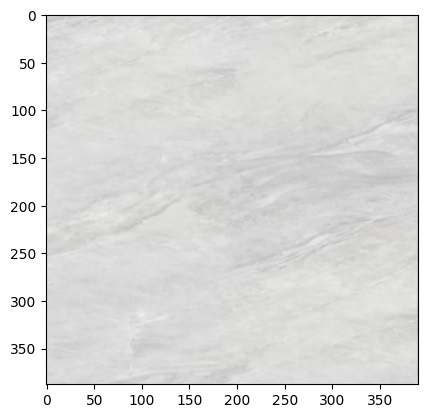

cacat = 0.3176776831324152%
retak = 1.2475055146615006%
utuh = 98.4348168022061%
Gambar yang diprediksi adalah : utuh
Apakah gambar utuh ?(y/n)
Terima kasih atas tanggapan Anda


In [28]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Masukan URL image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("Gambar yang diprediksi adalah : "+Categories[model.predict(l)[0]])
print(f'Apakah gambar {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("silakan masukkan y or n")

if(b=='n'):
  print("Apa gambarnya?")
  for i in range(len(Categories)):
    print(f"Masukan {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Silakan masukkan nomor yang valid di antaranya 0-{len(Categories)-1}")
    k=int(input())
  print("Harap tunggu beberapa saat hingga model belajar dari gambar ini :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"Modelnya sekarang {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Terima kasih atas tanggapan Anda")


In [29]:
confusion_matrix(y_pred,y_test)

array([[19,  0,  0],
       [ 0, 20,  0],
       [ 1,  0, 20]])

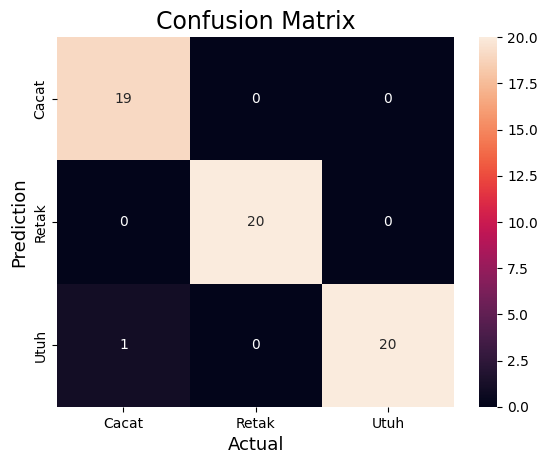

In [38]:

#Import the necessary libraries 
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
 
#compute the confusion matrix.
cm = confusion_matrix(y_pred, y_test)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Cacat','Retak','Utuh'],
            yticklabels=['Cacat','Retak','Utuh'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()